Assignment 2a Due 9/8
In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:

Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
Use those to solve a definite integral
Compare your algorithms to those from scipy
Compare all approximate solutions to the exact solutions
You can import only the following packages: numpy, math, scipy,

In [188]:
import numpy as np
import math
import scipy as sp 
import matplotlib.pyplot as plt
from scipy import integrate

Now we can define our integration algorithms

In [212]:
def riemann_midpoint(f,xmin,xmax,n_part):
    dx = (xmax - xmin)/float(n_part)
    area = 0
    for i in range (0,n_part):
        area += dx*f(xmin + (i+0.5)*dx)
    return area

In [213]:
riemann_midpoint(lambda x : x**3, 0,2,4)
#after defining the integration functions,
#I checked to see if they were working by comparing to the values in the lecture slides. 

3.875

In [214]:
def riemann_trap(f,xmin,xmax,n_part):
    dx = (xmax - xmin)/float(n_part)
    area = 0
    for i in range (0,n_part):
        area += dx*(f(xmin + i*dx))
    area += 0.5 * f(xmax)*dx
    return area

In [215]:
riemann_trap(lambda x : x**3, 0,2,4)

4.25

In [193]:
def simpson(f, xmin, xmax, n_part):
    return riemann_midpoint(f,xmin, xmax, n_part)*(2/3)+ riemann_trap(f,xmin, xmax, n_part)*(1/3)

In [194]:
simpson(lambda x : x**3, 0,2,4)

3.9999999999999996


Question
Sanity checking your code is very important. How can you check that your functions are working properly?

I can put in simple integration functions that I can either easily work out by hand or know the correct answer to 
in order to compare the results and make sure it is working well.


For this notebook assigment we would like to solve the integral\ $\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

Question
Have you seen an integral like this before in physics? From where?
Electric Field on the Axis of a Ring of Charge

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's lambda function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

Question
What is the exact solution?

In [207]:
exact_sol = 0.353553

In [195]:
funct=lambda x : (2/(4+x**2)**1.5)

In [196]:
riemann_midpoint(funct, 0,2,6)

0.3538599754585315

In [197]:
riemann_trap(funct,0,2,6)

0.39460661308079814

In [198]:
simpson(funct, 0,2,6)

0.367442187999287

Use the trapz and simps methods from scipy's integration library to solve the integral.

In [199]:
sci_quad=integrate.quad(funct,0,2)
sci_quad[0]

0.3535533905932738

In [200]:
dx = float((2)/6)
xs = np.linspace(0,2,7)  
ys = (2/(4+xs**2)**1.5)
sci_trap = integrate.trapz(ys,xs,dx)
print(sci_trap)

0.35293994641413146


In [201]:
sci_simp=integrate.simps(ys,xs)
print(sci_simp)

0.35355179062444925


Question
How do scipy integrals compare to yours? Support your answer.
Overal, the scipy integrals are more accurate, this is obvious when looking at the graph below that plots the percent errors.

Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method.

In [211]:
print(abs(riemann_midpoint(funct, 0,2,6) - exact_sol)/exact_sol)
print(abs(riemann_trap(funct, 0,2,6) - exact_sol)/exact_sol)
print(abs(simpson(funct, 0,2,6) - exact_sol)/exact_sol)

0.0008682586727632849
0.11611728108882723
0.03928459947811788


In [208]:
p1 = 100*abs(riemann_midpoint(funct, 0,2,6) - exact_sol)/exact_sol
p2 = 100*abs(riemann_trap(funct, 0,2,6) - exact_sol)/exact_sol
p3 = 100*abs(simpson(funct, 0,2,6) - exact_sol)/exact_sol
p4 = 100*abs(sci_quad[0] - exact_sol)/exact_sol
p5 = 100*abs(sci_trap - exact_sol)/exact_sol
p6 = 100*abs(sci_simp - exact_sol)/exact_sol

In [204]:
print(p1,p2,p3,p4,p5,p6)

0.08682586727632849 11.611728108882723 3.9284599478117883 0.00011047658308095684 0.17339793068324988 0.00034206343907679275


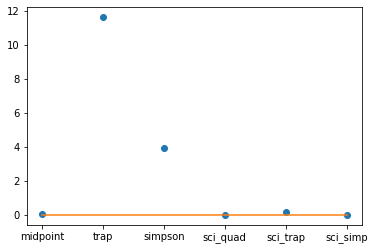

In [206]:
set = [p1,p2,p3,p4,p5,p6]
set2 = ['midpoint', 'trap', 'simpson','sci_quad','sci_trap','sci_simp']
plt.plot(set2,set, 'o')
plt.plot([0,0,0,0,0,0],'-')
plt.show()

In [217]:
sci_quad1=integrate.quad(lambda x : math.exp(-x**2),-np.Inf,np.Inf)
sci_quad1[0]

1.7724538509055159